# 2024 Winter Introduction to Deep Learning
### Based on Prof. Oh's Youtube Lecture
https://youtube.com/playlist?list=PLvbUC2Zh5oJvByu9KL82bswYT2IKf0K1M

> Assignment #3


*   Youtube Lecture #9-11
*   Written by Seungeun Lee

## 1. Revisiting MLP of Assignment1





*    Reference. https://github.com/Justin-A/DeepLearning101/blob/master/2-1_MNIST_MLP.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 2.3.0+cu121  Device: cuda


In [3]:
BATCH_SIZE = 32
EPOCHS = 10

In [4]:
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15761629.57it/s]


Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 494928.35it/s]


Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4347828.88it/s]


Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4173171.69it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



*    The code above loads the data with PyTorch function 'datasets' and 'DataLoader', and works only for MNIST.
*    Can we make our custom datasets and dataloader?
*    Please download a zip file from https://www.kaggle.com/datasets/andrewmvd/animal-faces, and upload the file to your Colab (Google Drive).

In [5]:
# connecting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
%cd /content/drive/MyDrive/학교/코딩스터디/intro-dl

/content/drive/MyDrive/학교/코딩스터디/intro-dl


In [12]:
!unzip -q archive.zip

In [13]:
dir = '/content/drive/MyDrive/학교/코딩스터디/intro-dl/afhq'

#### (1) Using torchvision.transforms
*     Reference. https://www.kaggle.com/code/eduardignatev/madmo-pro-homework-02#Load-Data

In [14]:
transform_train = transforms.Compose([ ## Data transformation only for train data
    transforms.Resize(size=(256, 256)), ## Resizing the data into (256, 256)
    transforms.RandomRotation(30), ## 30 degree rotation (data augmentation)
    transforms.ToTensor(), ## To 'Pytorch Tensor' -> Pytorch Deep Learning Models like CNN (we'll deal with it later on) get only tensor as an input
])
transform_val = transforms.Compose([ ## Data transformation only for validation (here, it works like the 'test' data...) data
    transforms.Resize(size=(256, 256)), ## Resizing the data into (256, 256)
    transforms.ToTensor() ## To 'Pytorch Tensor'
])

## Please note that the data augmentation technique is not usually implemented to validation/test dataset
## This is why we split transform_train and transform_val -- transform_val does not need
## transforms.RandomRotation(30), ## 30 degree rotation (data augmentation)

train_data = datasets.ImageFolder(root=f'{dir}/train', transform=transform_train)
## Pytorch function datasets.ImageFolder organizes the data in root directory (here, '/content/drive/MyDrive/intro-dl/afhq/train')
## and applies transform_train as defined above.
val_data = datasets.ImageFolder(root=f'{dir}/val', transform=transform_val)
## Pytorch function datasets.ImageFolder organizes the data in root directory (here, '/content/drive/MyDrive/intro-dl/afhq/val')
## and applies transform_val as defined above.

train_loader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle = True)
## Pytorch function DataLoader organizes the 'shuffled' (shuffle = True) data in train_data as defined above with the batch size of 16.
val_loader = torch.utils.data.DataLoader(val_data, batch_size=16, shuffle = True)
## Pytorch function DataLoader organizes the 'shuffled' (shuffle = True) data in val_data as defined above with the batch size of 16.

In [15]:
train_data.class_to_idx ## It automatically catches the classes in train_data -> check it by yourself!
## (see /content/drive/MyDrive/intro-dl/afhq/val directory in your Google Drive)

{'cat': 0, 'dog': 1, 'wild': 2}

In [16]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
## brings the next images and labels

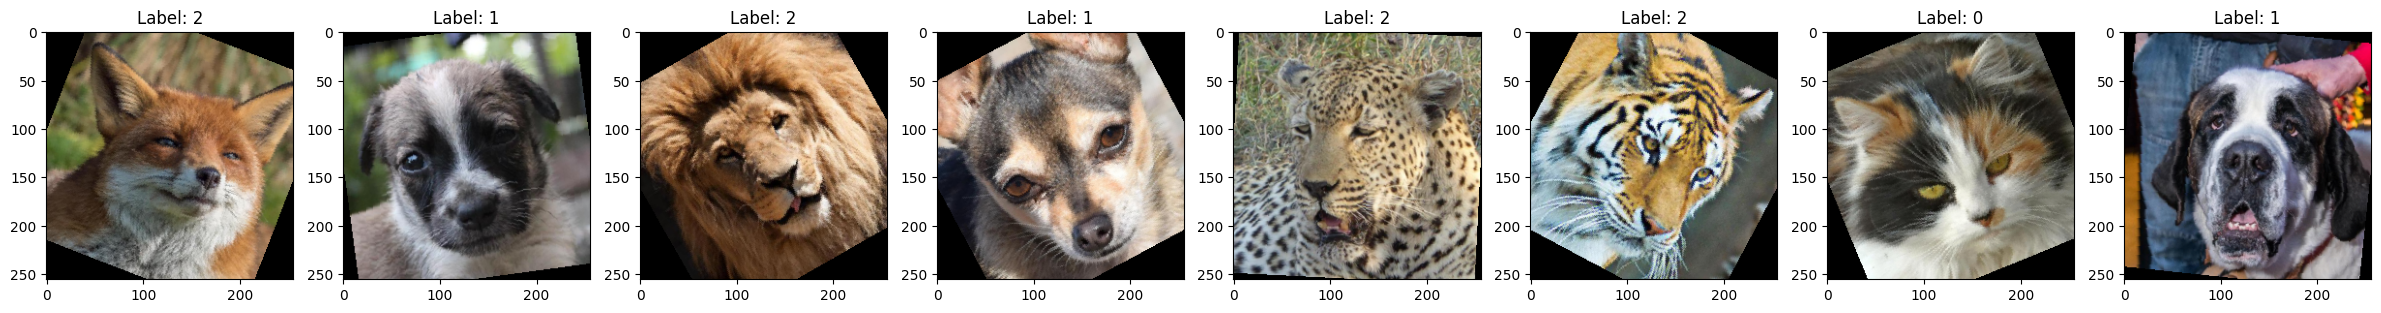

In [17]:
def show_imgs(imgs, labels, preds=None):
    f, axes= plt.subplots(1, 8, figsize=(30,5))
    for i, axis in enumerate(axes):
        axes[i].imshow(np.squeeze(np.transpose(imgs[i].numpy(), (1, 2, 0))), cmap='gray')
        axes[i].set_title(f'Label: {labels[i].numpy()}')
        if preds != None:
            axes[i].set_xlabel(f'Pred: {np.argmax(preds[i].numpy())}')
    plt.show()

show_imgs(images, labels)

## shows the sample train_data
## 30 degree rotation!

#### (2) Making a customized datasets and dataloader

In [ ]:
## We'll use the library 'os' -- please revisit Assignment1

In [18]:
import os

In [20]:
train_cat = os.listdir(f'{dir}/train/cat')
train_dog = os.listdir(f'{dir}/train/dog')
train_wild = os.listdir(f'{dir}/train/wild')

In [22]:
# WARNING: DO NOT RUN THIS CODE. IT TAKES TOO LONG TIME TO GET THE RESULT.

train_cat_image = []
train_dog_image = []
train_wild_image = []

train_cat_target = []
train_dog_target = []
train_wild_target = []

for i in range(len(train_cat)):
  image = plt.imread(os.path.join('/content/drive/MyDrive/intro-dl/afhq/train/cat', train_cat[i]))
  train_cat_image.append(image)
  train_cat_target.append(0)

for i in range(len(train_dog)):
  image = plt.imread(os.path.join('/content/drive/MyDrive/intro-dl/afhq/train/dog', train_dog[i]))
  train_dog_image.append(image)
  train_dog_target.append(1)

for i in range(len(train_wild)):
  image = plt.imread(os.path.join('/content/drive/MyDrive/intro-dl/afhq/train/wild', train_wild[i]))
  train_wild_image.append(image)
  train_wild_target.append(2)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/intro-dl/afhq/train/cat/flickr_cat_000002.jpg'

### Question 1. Explain os.path.join function.
##### Your Answer: combines one or more path components into a single path

## 2. Backpropagation and PyTorch Autograd

*   https://kingnamji.tistory.com/44



In [23]:
import torch

In [24]:
w = torch.tensor(3.0, requires_grad = True) ## requires_grad = True: it saves the gradient

In [25]:
y = w**3 + 10

In [26]:
y.backward() ## backward() calculates the derivative

In [27]:
print(f'Differentiating y by w: {w.grad}') ## check it by yourself!! dy/dw = 3*w^2 ..., so

Differentiating y by w: 27.0


In [28]:
## Another example with the loss fuction
import torch
import torch.nn as nn

In [29]:
x = torch.ones(5)  # input
y = torch.zeros(3)  # output

w = torch.randn(5, 3, requires_grad=True) # weight
b = torch.randn(3, requires_grad=True) # bias

In [30]:
z = torch.matmul(x, w) + b # z = wx + b
loss_fn = nn.MSELoss() # loss function

In [31]:
loss = loss_fn(z, y)

loss.backward()

In [32]:
print(f'Differentiating loss by w :\n {w.grad}')
print(f'Differentiating loss by b : {b.grad}')

Differentiating loss by w :
 tensor([[ 1.8396,  2.7736, -2.2826],
        [ 1.8396,  2.7736, -2.2826],
        [ 1.8396,  2.7736, -2.2826],
        [ 1.8396,  2.7736, -2.2826],
        [ 1.8396,  2.7736, -2.2826]])
Differentiating loss by b : tensor([ 1.8396,  2.7736, -2.2826])


### Question 2. PyTorch Autograd and DataLoader
##### Read the following document and summarize it.
##### https://velog.io/@euisuk-chung/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98-%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98-%EA%B8%B0%EC%B4%88-%EC%9A%94%EC%86%8C-Autograd%EB%9E%80

## 3. Vanishing Gradient Problem

In [ ]:
# Although we usually build DL models based on PyTorch,
# we sometimes need to use TensorFlow upon your colleagues' requests

In [ ]:
## Let's take a look at the vanishing gradient problem w/ Tensorflow

*    Reference. https://github.com/bhattbhavesh91/vanishing-gradient-problem/blob/master/vanishing-gradient-notebook.ipynb

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
from matplotlib.colors import ListedColormap
from mlxtend.plotting import plot_decision_regions
from pylab import rcParams
from sklearn.datasets import make_circles, make_moons
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [34]:
# Suppress scientific notation in NumPy array printing
np.set_printoptions(suppress=True)

# Create a colormap with two colors: white for 0 and red for 1
zero_one_colourmap = ListedColormap(('white', 'red'))

# Set the default figure size to 14 inches wide and 7 inches tall
rcParams['figure.figsize'] = 14, 7

# Set the background color of the axes to a dark gray color (#383838)
rcParams['axes.facecolor'] = '#383838'

In [35]:
# Generate 1000 samples for a synthetic dataset of concentric circles
X, y = make_circles(n_samples=1000,   # Total number of samples
                    factor=0.85,      # Scale factor between inner and outer circle
                    random_state=2021, # Seed for random number generator for reproducibility
                    noise=0.1)         # Standard deviation of Gaussian noise added to the data

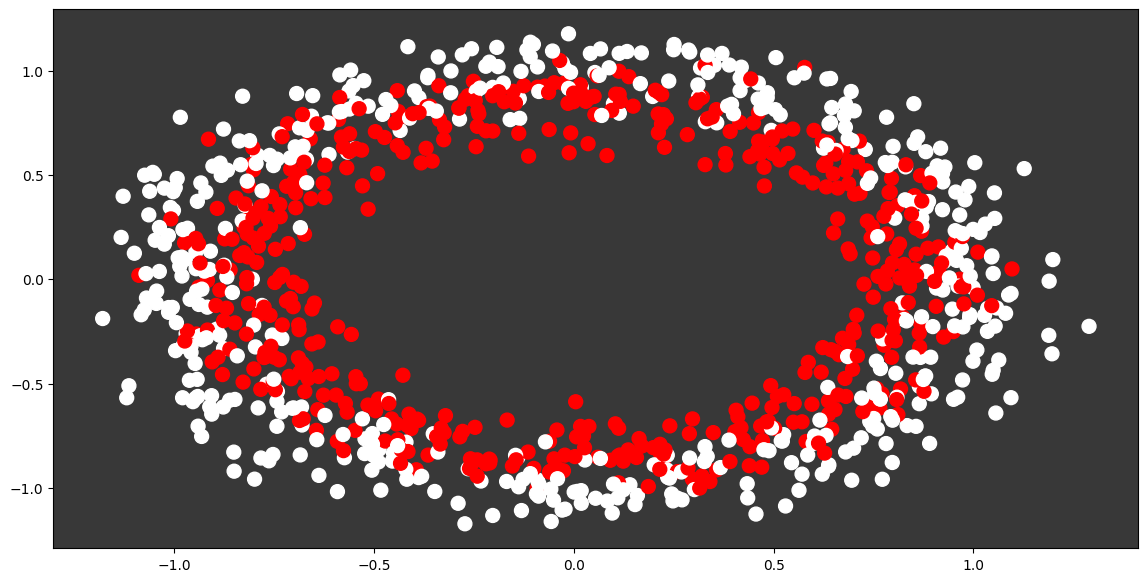

In [36]:
# Create a scatter plot of the generated circle data
plt.scatter(X[:, 0], X[:, 1],   # X and Y coordinates of the points
            c=y, s=100,         # Color the points based on their labels (y), size of points set to 100
            cmap=zero_one_colourmap) # Use the custom colormap defined earlier (white for 0, red for 1)

# Display the plot
plt.show()

In [37]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,              # Input features (X) and target labels (y)
    test_size=0.33,    # 33% of the data will be used for testing, 67% for training
    random_state=42    # Seed for random number generator for reproducibility
)

In [38]:
# Function to create a neural network model with a specified activation function
def get_model(inp_activation):
    model = Sequential()  # Initialize a sequential model
    model.add(Dense(10, input_dim=2, activation=inp_activation))  # Add input layer with specified activation
    for _ in range(9):  # Add 9 hidden layers with the same activation function
        model.add(Dense(10, activation=inp_activation))
    model.add(Dense(1, activation="sigmoid"))  # Add output layer with sigmoid activation for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Compile the model
    return model

In [39]:
# Function to calculate the gradient and percentage change in weight
def change_in_weight_gradient(old_weight, new_weight, learning_rate):
    gradient = (old_weight - new_weight) / learning_rate  # Calculate gradient
    pct_change_weight = abs(100 * (old_weight - new_weight) / old_weight)  # Calculate percentage change in weight
    return gradient, pct_change_weight

*     Sigmoid Model

In [40]:
# Create and compile a model with sigmoid activation
sigmoid_model = get_model("sigmoid")

In [41]:
sigmoid_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                1

In [42]:
sigmoid_model_first_layer_weights = sigmoid_model.get_weights()[0][0]

In [43]:
sigmoid_model_first_layer_weights

array([ 0.54135305, -0.28710568, -0.3414028 , -0.32232562, -0.5316149 ,
        0.59614235, -0.03632689, -0.1154291 ,  0.3815971 , -0.38093957],
      dtype=float32)

In [44]:
# Train the sigmoid model for 1 epoch
sigmoid_history = sigmoid_model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))

21/21 [==============================] - 5s 22ms/step - loss: 0.7369 - accuracy: 0.5119 - val_loss: 0.7416 - val_accuracy: 0.4758


In [45]:
sigmoid_model_first_layer_weights_updated = sigmoid_model.get_weights()[0][0]

In [46]:
sigmoid_model_first_layer_weights_updated

array([ 0.5413556 , -0.2871036 , -0.34140745, -0.3223163 , -0.53161246,
        0.5961456 , -0.03634224, -0.1154234 ,  0.38160983, -0.38093364],
      dtype=float32)

In [47]:
# Assuming 'sigmoid_model_first_layer_weights' and 'sigmoid_model_first_layer_weights_updated' are predefined
s_gradient, s_weight_change = change_in_weight_gradient(
    sigmoid_model_first_layer_weights,  # Weights before training
    sigmoid_model_first_layer_weights_updated,  # Weights after training
    sigmoid_model.optimizer.get_config()["learning_rate"]  # Learning rate used by the optimizer
)

In [48]:
s_gradient

array([-0.002563  , -0.00208616,  0.00464916, -0.00932813, -0.00244379,
       -0.00321865,  0.01535937, -0.00569969, -0.01272559, -0.00593066],
      dtype=float32)

In [49]:
s_weight_change

array([0.00047344, 0.00072662, 0.00136178, 0.00289401, 0.00045969,
       0.00053991, 0.04228101, 0.00493783, 0.00333482, 0.00155685],
      dtype=float32)

*     ReLU Model

In [50]:
# Create and compile a model with ReLU activation
activation_model = get_model("relu")

In [51]:
activation_model_old_first_layer_weight = activation_model.get_weights()[0][0]
activation_model_old_first_layer_weight

array([-0.29196757, -0.5831932 ,  0.23726046,  0.5226292 , -0.04347885,
       -0.07195932, -0.5460281 ,  0.35994416, -0.5853322 , -0.16333538],
      dtype=float32)

In [52]:
# Train the ReLU model for 1 epoch
activation_history = activation_model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))

21/21 [==============================] - 4s 24ms/step - loss: 0.6936 - accuracy: 0.4791 - val_loss: 0.6932 - val_accuracy: 0.4758


In [53]:
activation_model_updated_first_layer_weight = activation_model.get_weights()[0][0]

In [54]:
activation_model_updated_first_layer_weight

array([-0.29195708, -0.5724034 ,  0.23407827,  0.51503634, -0.03312777,
       -0.07856737, -0.53688854,  0.37027088, -0.5749644 , -0.17443718],
      dtype=float32)

In [55]:
# Calculate the gradient and percentage change in weight for the ReLU activation model
relu_gradient, relu_weight_change = change_in_weight_gradient(
    activation_model_old_first_layer_weight,     # Weights of the first layer before training
    activation_model_updated_first_layer_weight, # Weights of the first layer after training
    activation_model.optimizer.get_config()["learning_rate"]  # Learning rate used by the optimizer
)

In [56]:
relu_gradient

array([ -0.01049042, -10.789811  ,   3.1821876 ,   7.5928564 ,
       -10.35108   ,   6.6080537 ,  -9.139538  , -10.326713  ,
       -10.36781   ,  11.101797  ], dtype=float32)

In [57]:
relu_weight_change

array([ 0.00359301,  1.8501265 ,  1.3412212 ,  1.4528191 , 23.807165  ,
        9.183042  ,  1.6738219 ,  2.8689764 ,  1.7712694 ,  6.796933  ],
      dtype=float32)

### Question 3.
##### Check out this YouTube and write a line-by-line explanation of the code above -- ChatGPT allowed.
##### https://youtube.com/watch?v=wTyZqtJyp5g

## 4. Regression
*     Reference. https://www.geeksforgeeks.org/linear-regression-python-implementation/

In [58]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [59]:
data_url = "http://lib.stat.cmu.edu/datasets/boston" ## Loading Boston Housing Dataset -- a famous dataset for linear regression
raw_df = pd.read_csv(data_url, sep="\s+",
           skiprows=22, header=None)

In [60]:
X = np.hstack([raw_df.values[::2, :],
        raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [61]:
X

array([[  0.00632,  18.     ,   2.31   , ...,  15.3    , 396.9    ,
          4.98   ],
       [  0.02731,   0.     ,   7.07   , ...,  17.8    , 396.9    ,
          9.14   ],
       [  0.02729,   0.     ,   7.07   , ...,  17.8    , 392.83   ,
          4.03   ],
       ...,
       [  0.06076,   0.     ,  11.93   , ...,  21.     , 396.9    ,
          5.64   ],
       [  0.10959,   0.     ,  11.93   , ...,  21.     , 393.45   ,
          6.48   ],
       [  0.04741,   0.     ,  11.93   , ...,  21.     , 396.9    ,
          7.88   ]])

In [62]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [63]:
## Quick Question.
## Explain np.hstack, np.vstack, np.concatenate with proper examples. Google it and write your own answer.

## Your Answer
## np.hstack is a NumPy function that horizontally stacks arrays. It concatenates arrays along the second axis (axis=1), which means it joins arrays side by side.

import numpy as np

# Create two 1D arrays
array1 = np.array([1, 2, 3])
array2 = np.array([4, 5, 6])

# Horizontally stack arrays
result = np.hstack((array1, array2))

print(result)
# Output: [1 2 3 4 5 6]

[1 2 3 4 5 6]


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
## Quick Question.
## Explain X, y, and train_test_split function above.

## Your Answer
	# X:
  	# Represents input features of the dataset (e.g., coordinates of points).
  	# It is a NumPy array or DataFrame.
	# y:
	  # Represents target labels of the dataset (e.g., class labels 0 or 1).
  	# It is a NumPy array or Series.
  # train_test_split
    # The train_test_split function splits a dataset into training and testing subsets

In [65]:
reg = linear_model.LinearRegression() ## LR Model of Scikit-learn
reg.fit(X_train, y_train)

LinearRegression()

In [66]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [ -0.0895714    0.06731329   0.05046492   2.18579583 -17.20539752
   3.63606995   0.0020558   -1.36602886   0.28957672  -0.01227001
  -0.83488185   0.00940361  -0.50400832]
Variance score: 0.720905667266174


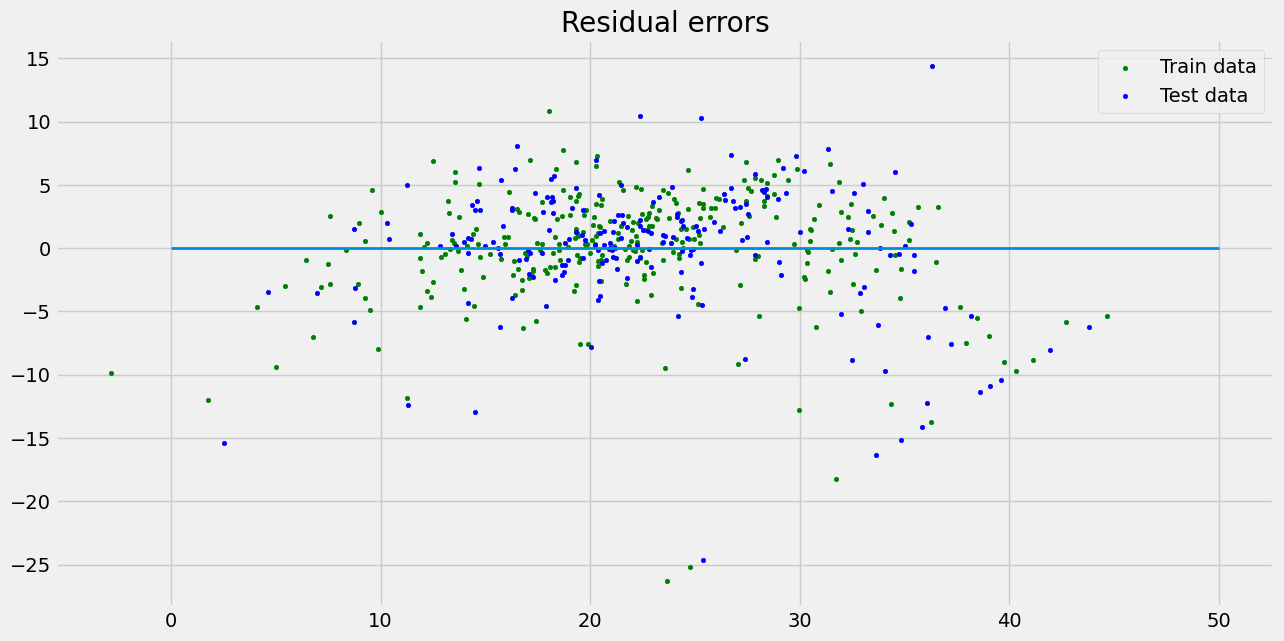

In [67]:
# plot for residual error

# setting plot style
plt.style.use('fivethirtyeight')

# plotting residual errors in training data
plt.scatter(reg.predict(X_train),
            reg.predict(X_train) - y_train,
            color="green", s=10,
            label='Train data')

# plotting residual errors in test data
plt.scatter(reg.predict(X_test),
            reg.predict(X_test) - y_test,
            color="blue", s=10,
            label='Test data')

# plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)

# plotting legend
plt.legend(loc='upper right')

# plot title
plt.title("Residual errors")

# method call for showing the plot
plt.show()

## 5. Activation Function
*    Reference. https://sanghyu.tistory.com/182

In [68]:
## 1. Sigmoid
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.Sigmoid() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [69]:
## 2. Tanh [Hyperbolic tangent]
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.Tanh() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [70]:
## 3. ReLU
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.ReLU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

In [71]:
## 4. Leaky ReLU
import torch
import torch.nn as nn

class DenseBlock(nn.Module):
	def __init__(self, in_dim, out_dim):
		super(DenseBlock, self).__init__()
		self.dense = nn.Linear(in_dim, out_dim)
		self.act = nn.LeakyReLU() # activation function

	def forward(self, x):
		out = self.act(self.dense(x))
		return out

### Question 4.
##### Write the code for Maxout, ELU, and GELU in the same format.
##### For GELU, please search what GELU is and write your own answer.

In [73]:
class Maxout(nn.Module):
    def __init__(self, input_features, output_features, num_units):
        super(Maxout, self).__init__()
        self.num_units = num_units
        self.output_features = output_features
        self.linear = nn.Linear(input_features, output_features * num_units)

    def forward(self, x):
        shape = x.size()
        out = self.linear(x)
        out = out.view(shape[0], self.output_features, self.num_units)
        return torch.max(out, dim=2)[0]

maxout = Maxout(input_features=10, output_features=5, num_units=2)
input_data = torch.randn(3, 10)
output_data = maxout(input_data)
print(output_data)

tensor([[-0.2778,  0.8052,  0.6382,  1.4506,  0.6942],
        [ 0.6936,  0.0995,  0.7694,  0.9628,  1.0325],
        [ 0.2751,  1.1386,  0.5018,  1.2994,  0.7233]], grad_fn=<MaxBackward0>)


In [74]:
elu = nn.ELU(alpha=1.0)

input_data = torch.randn(3, 10)
output_data = elu(input_data)
print(output_data)

tensor([[-0.7688,  0.8761, -0.9501,  0.9095,  0.7517,  0.2619, -0.9164,  0.6320,
          0.8136, -0.7496],
        [ 1.3912, -0.6390, -0.1556, -0.6098, -0.2834,  1.1061,  1.3243,  0.9870,
         -0.0757,  1.5056],
        [-0.2524,  0.5623,  0.6157,  0.1736, -0.8642, -0.3829,  0.2709,  2.0088,
         -0.5593, -0.2436]])


In [75]:
class GELU(nn.Module):
    def __init__(self):
        super(GELU, self).__init__()

    def forward(self, x):
        return x * 0.5 * (1.0 + torch.erf(x / torch.sqrt(torch.tensor(2.0))))

gelu = GELU()
input_data = torch.randn(3, 10)
output_data = gelu(input_data)
print(output_data)

tensor([[ 1.1334,  0.6817,  0.1034, -0.0969, -0.0420, -0.0941, -0.0114,  0.0943,
          0.3886,  0.6358],
        [ 0.4073, -0.1515,  0.7625, -0.1598, -0.1024,  0.2782,  0.8468, -0.0793,
          0.0902, -0.0950],
        [ 1.3967, -0.0941,  0.7420, -0.0062, -0.0915,  0.6951, -0.0753,  1.6257,
          0.6407,  0.0109]])


### The End.

##### Please upload your Colab file @Github https://github.com/duneag2/intro-dl/tree/main/Assignment3

*   First, make your folder by your name (e.g. seungeun)
*   Then upload your "Jupyter Notebook" file under that directory

###### Need Help?



*   Please refer to this link https://yeko90.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC-colab%EC%BD%94%EB%9E%A9%EC%97%90%EC%84%9C-%EC%95%95%EC%B6%95%ED%8C%8C%EC%9D%BC-%ED%92%80%EA%B8%B0 OR
*   Just save your Jupyter Notebook (.ipynb) file in here (colab) and upload via 'Add file' - 'Upload files' https://nthree.tistory.com/60